# Load files & download

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from collections import defaultdict
from textwrap import wrap


%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]

sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

rcParams['figure.figsize'] = 12, 8

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 35.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 38.6 MB/s eta 0:00:00


In [13]:
df=pd.read_csv("/content/drive/MyDrive/yahoo_QA/train.csv",names=['class', 'title', 'content', 'answer'])

In [14]:
categories = {1: 'Society & Culture', 2: 'Science & Mathematics', 3: 'Health', 4: 'Education & Reference',
              5: 'Computers & Internet', 6: 'Sports', 7: 'Business & Finance', 8: 'Entertainment & Music',
              9: 'Family & Relationships', 10: 'Politics & Government'}

labels=['Society & Culture', 'Science & Mathematics', 'Health', 'Education & Reference',
        'Computers & Internet', 'Sports', 'Business & Finance', 'Entertainment & Music',
        'Family & Relationships', 'Politics & Government']

In [15]:
df['label'] = df['class'].map(categories)
df = df.drop('class', axis=1)

In [16]:
label_dict = dict(zip(labels, range(0,len(labels))))
df['index']=df['label'].apply(labels.index)

In [8]:
import random
#1: 'Society & Culture', 2: 'Science & Mathematics', 3: 'Health', 4: 'Education & Reference', 5: 'Computers & Internet'
# Return a list of indices
cul_idx=random.sample(list(df.query('label=="Society & Culture"').index), 605)
sci_idx=random.sample(list(df.query('label=="Science & Mathematics"').index),197)
health_idx=random.sample(list(df.query('label=="Health"').index),346)
edu_idx=random.sample(list(df.query('label=="Education & Reference"').index),183)
comp_idx=random.sample(list(df.query('label=="Computers & Internet"').index),944)

# Use indices to select data
df= df.loc[cul_idx + sci_idx + health_idx+ edu_idx + comp_idx]
index_list=cul_idx + sci_idx + health_idx+ edu_idx + comp_idx

In [9]:
from sklearn.utils import shuffle
df = shuffle(df)

In [10]:
def show_confusion_matrix(confusion_matrix):
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('True')
  plt.xlabel('Predicted');



# zeroshot



In [11]:
from sklearn.metrics import accuracy_score
from tqdm import tqdm
from transformers import *

def model_pipeline(model_name, df, candidate_labels):

  classifier=pipeline("zero-shot-classification",model=model_name)

  predict=[]
  true=[]
  for i in tqdm(range(0, len(df))):
    text = df.iloc[i,]['title']
    cat = df.iloc[i,]['label']
    res = classifier(text, candidate_labels, multi_label=False)
    labels = res['labels'][0]

    predict.append(labels)
    true.append(cat)

  cm = confusion_matrix(true, predict)
  df_cm = pd.DataFrame(cm, index=candidate_labels, columns=candidate_labels)
  show_confusion_matrix(df_cm)

  return(classification_report(true, predict, target_names=candidate_labels))

/usr/local/lib/python3.10/dist-packages/transformers/generation_utils.py:24: FutureWarning: Importing `GenerationMixin` from `src/transformers/generation_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import GenerationMixin` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation_tf_utils.py:24: FutureWarning: Importing `TFGenerationMixin` from `src/transformers/generation_tf_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import TFGenerationMixin` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation_flax_utils.py:24: FutureWarning: Importing `FlaxGenerationMixin` from `src/transformers/generation_flax_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import FlaxGenerationMixin` instead.
  warnings.warn(
No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'
Xformers is not insta

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--typeform--distilbert-base-uncased-mnli/snapshots/cfa538a0fddbbd978fefe8966c1aeff7ad409c90/config.json
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
Model config DistilBertConfig {
  "_name_or_path": "typeform/distilbert-base-uncased-mnli",
  "activation": "gelu",
  "architectures": [
    "DistilBertForSequenceClassification"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "finetuning_task": "mnli",
  "hidden_dim": 3072,
  "id2label": {
    "0": "ENTAILMENT",
    "1": "NEUTRAL",
    "2": "CONTRADICTION"
  },
  "initializer_range": 0.02,
  "label2id": {
    "CONTRADICTION": 2,
    "ENTAILMENT": 0,
    "NEUTRAL": 1
  },
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0

loading weights file model.safetensors from cache at /root/.cache/huggingface/hub/models--typeform--distilbert-base-uncased-mnli/snapshots/cfa538a0fddbbd978fefe8966c1aeff7ad409c90/model.safetensors
All model checkpoint weights were used when initializing DistilBertForSequenceClassification.

All the weights of DistilBertForSequenceClassification were initialized from the model checkpoint at typeform/distilbert-base-uncased-mnli.
If your task is similar to the task the model of the checkpoint was trained on, you can already use DistilBertForSequenceClassification for predictions without further training.


loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--typeform--distilbert-base-uncased-mnli/snapshots/cfa538a0fddbbd978fefe8966c1aeff7ad409c90/config.json
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
Model config DistilBertConfig {
  "_name_or_path": "typeform/distilbert-base-uncased-mnli",
  "activation": "gelu",
  "architectures": [
    "DistilBertForSequenceClassification"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "finetuning_task": "mnli",
  "hidden_dim": 3072,
  "id2label": {
    "0": "ENTAILMENT",
    "1": "NEUTRAL",
    "2": "CONTRADICTION"
  },
  "initializer_range": 0.02,
  "label2id": {
    "CONTRADICTION": 2,
    "ENTAILMENT": 0,
    "NEUTRAL": 1
  },
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0

loading file vocab.txt from cache at /root/.cache/huggingface/hub/models--typeform--distilbert-base-uncased-mnli/snapshots/cfa538a0fddbbd978fefe8966c1aeff7ad409c90/vocab.txt
loading file tokenizer.json from cache at None
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at /root/.cache/huggingface/hub/models--typeform--distilbert-base-uncased-mnli/snapshots/cfa538a0fddbbd978fefe8966c1aeff7ad409c90/special_tokens_map.json
loading file tokenizer_config.json from cache at /root/.cache/huggingface/hub/models--typeform--distilbert-base-uncased-mnli/snapshots/cfa538a0fddbbd978fefe8966c1aeff7ad409c90/tokenizer_config.json
loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--typeform--distilbert-base-uncased-mnli/snapshots/cfa538a0fddbbd978fefe8966c1aeff7ad409c90/config.json
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.jso

'                       precision    recall  f1-score   support\n\n    Society & Culture       0.95      0.46      0.62       944\nScience & Mathematics       0.24      0.28      0.26       183\n               Health       0.49      0.73      0.59       346\nEducation & Reference       0.73      0.06      0.10       197\n Computers & Internet       0.44      0.79      0.57       605\n\n             accuracy                           0.54      2275\n            macro avg       0.57      0.46      0.43      2275\n         weighted avg       0.67      0.54      0.53      2275\n'

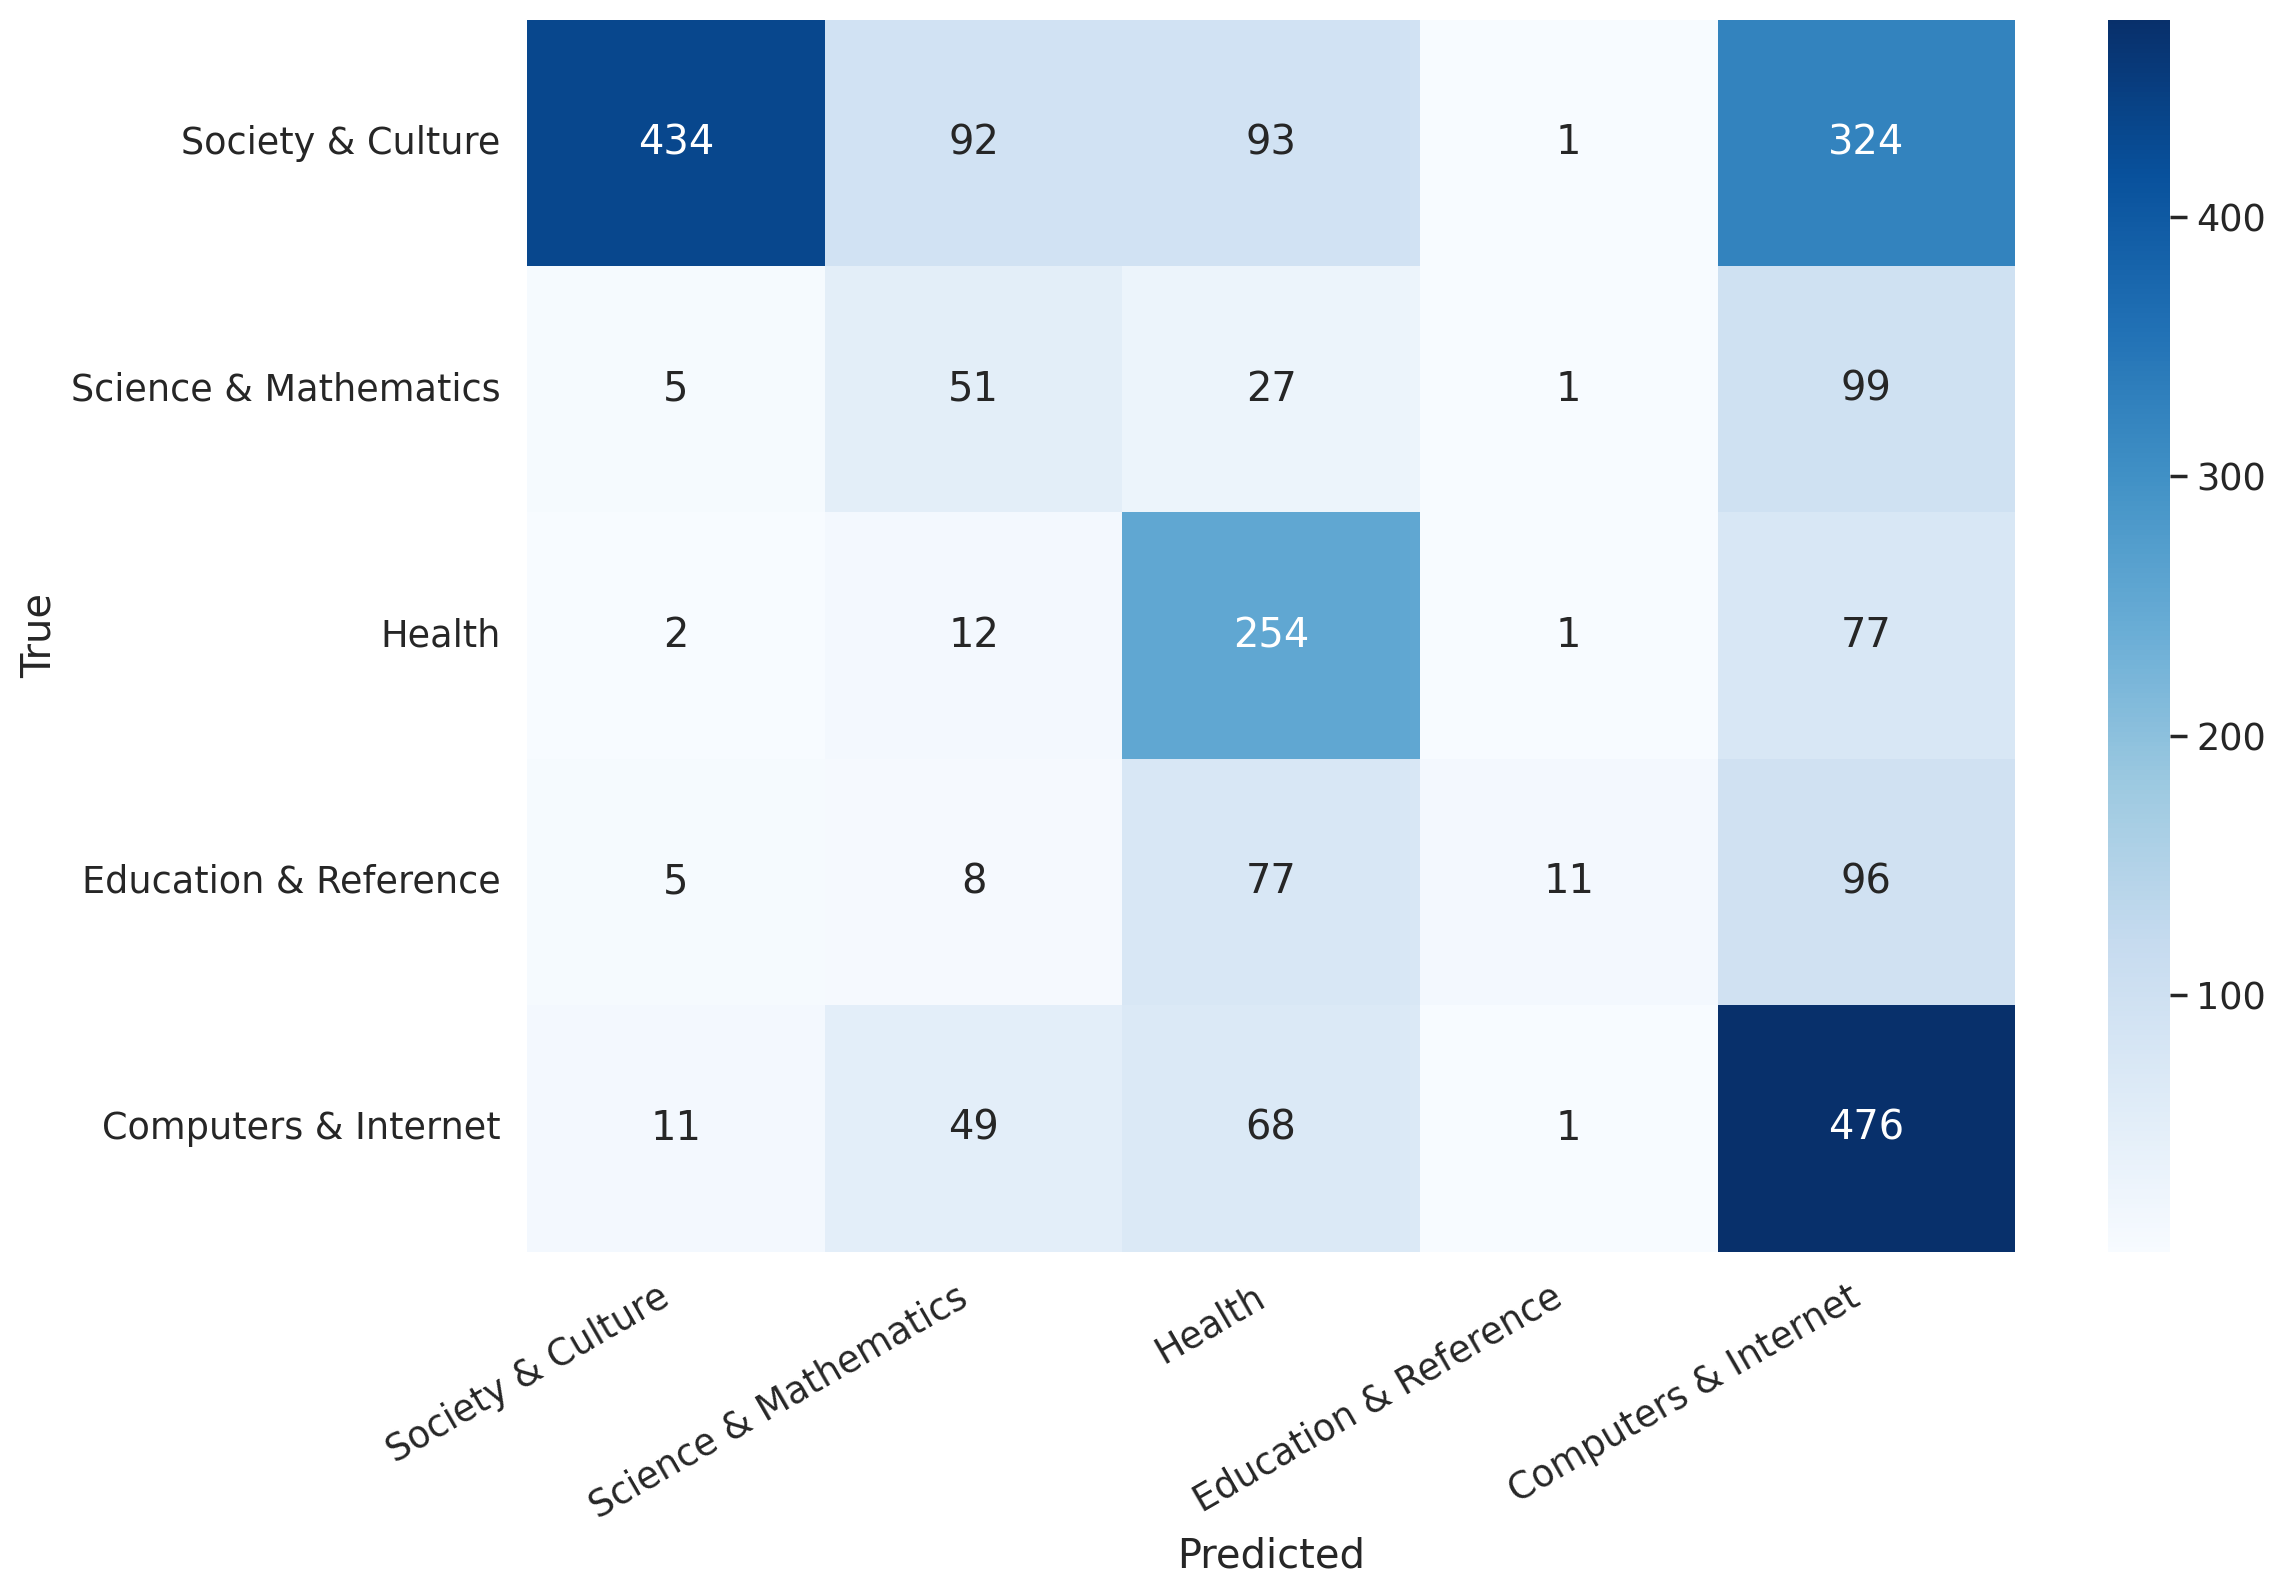

In [12]:
model_pipeline("typeform/distilbert-base-uncased-mnli", df, labels[0:5])

In [17]:
import random
#1: 'Society & Culture', 2: 'Science & Mathematics', 3: 'Health', 4: 'Education & Reference', 5: 'Computers & Internet'
# Return a list of indices
cul_idx=random.sample(list(df.query('label=="Society & Culture"').index), 555)
sci_idx=random.sample(list(df.query('label=="Science & Mathematics"').index),131)
health_idx=random.sample(list(df.query('label=="Health"').index),535)
edu_idx=random.sample(list(df.query('label=="Education & Reference"').index),240)
comp_idx=random.sample(list(df.query('label=="Computers & Internet"').index),359)

# Use indices to select data
df2= df.loc[cul_idx + sci_idx + health_idx+ edu_idx + comp_idx]
index_list2=cul_idx + sci_idx + health_idx+ edu_idx + comp_idx

from sklearn.utils import shuffle
df2= shuffle(df2)

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--typeform--distilbert-base-uncased-mnli/snapshots/cfa538a0fddbbd978fefe8966c1aeff7ad409c90/config.json
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
Model config DistilBertConfig {
  "_name_or_path": "typeform/distilbert-base-uncased-mnli",
  "activation": "gelu",
  "architectures": [
    "DistilBertForSequenceClassification"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "finetuning_task": "mnli",
  "hidden_dim": 3072,
  "id2label": {
    "0": "ENTAILMENT",
    "1": "NEUTRAL",
    "2": "CONTRADICTION"
  },
  "initializer_range": 0.02,
  "label2id": {
    "CONTRADICTION": 2,
    "ENTAILMENT": 0,
    "NEUTRAL": 1
  },
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0

'                       precision    recall  f1-score   support\n\n    Society & Culture       0.87      0.45      0.59       359\nScience & Mathematics       0.35      0.26      0.30       240\n               Health       0.66      0.67      0.67       535\nEducation & Reference       0.29      0.03      0.06       131\n Computers & Internet       0.46      0.74      0.57       555\n\n             accuracy                           0.55      1820\n            macro avg       0.52      0.43      0.44      1820\n         weighted avg       0.57      0.55      0.53      1820\n'

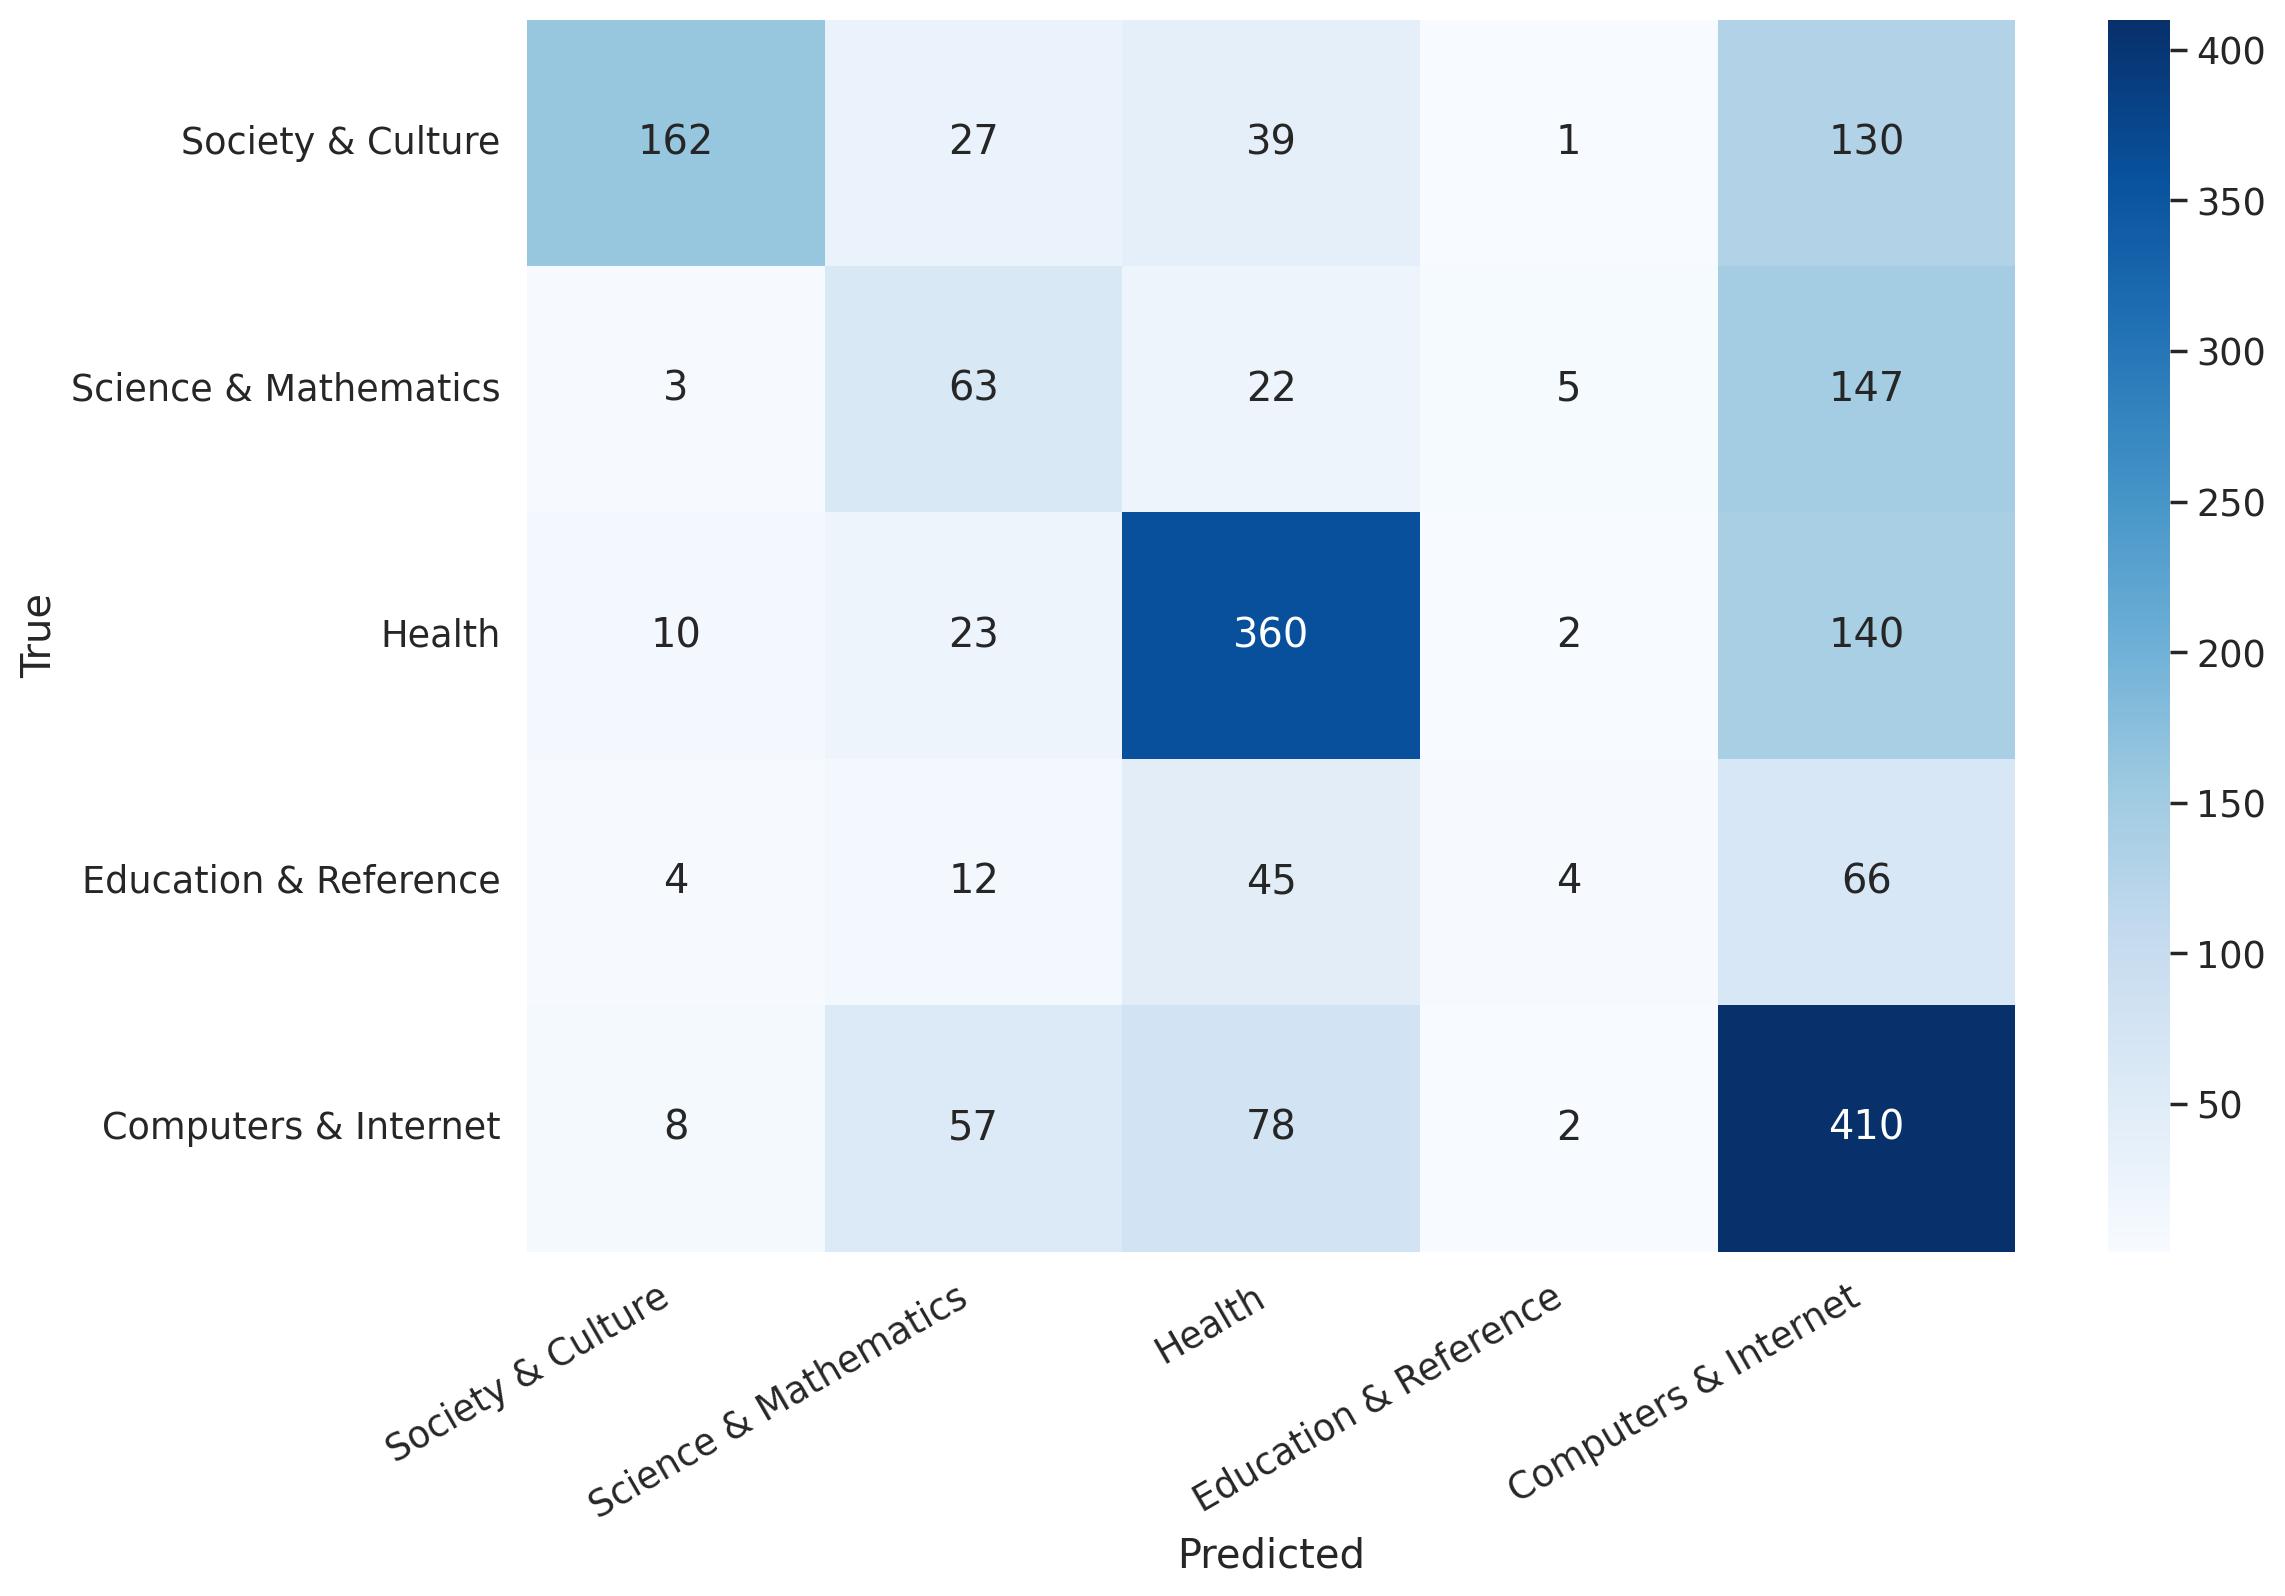

In [18]:
model_pipeline("typeform/distilbert-base-uncased-mnli", df2, labels[0:5])